<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/Estacionariedade%2C_tend%C3%AAncia_e_sazonalidade_Insumo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES IMPORT, SKTIME AND STATSMODELS INSTALLING AND DATASET IMPORT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install statsmodels  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 23.0 MB/s 
     |████████████████████████████████| 3.3 MB 22.4 MB/s 
     |████████████████████████████████| 9.8 MB 38.3 MB/s 
     |████████████████████████████████| 34.5 MB 8.8 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
#Dataset import
from google.colab import files
uploaded = files.upload()

Saving Insumo 6 - FH 3h.xlsx to Insumo 6 - FH 3h.xlsx


BASICS OF THE TIME SERIES

In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Insumo 6 - FH 3h.xlsx']))
df

,Data,Nível Insumo 6 (%)
0,2020-01-01 00:00:00,32.936077
1,2020-01-01 03:00:00,32.930149
2,2020-01-01 06:00:00,32.922226
3,2020-01-01 09:00:00,32.927616
4,2020-01-01 12:00:00,32.933006
...,...,...
7051,2022-05-31 09:00:00,35.424347
7052,2022-05-31 12:00:00,35.462742
7053,2022-05-31 15:00:00,35.426891
7054,2022-05-31 18:00:00,35.437592


In [ ]:
#Setting date as the index
df.set_index('Data', inplace=True, drop=True)

In [ ]:
#Checking if data is the index
df.head()

,Nível Insumo 6 (%)
Data,
2020-01-01 00:00:00,32.936077
2020-01-01 03:00:00,32.930149
2020-01-01 06:00:00,32.922226
2020-01-01 09:00:00,32.927616
2020-01-01 12:00:00,32.933006


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2020-01-01 00:00:00 to 2022-05-31 21:00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nível Insumo 6 (%)  7056 non-null   object
dtypes: object(1)
memory usage: 110.2+ KB


PRE-PROCESSING

In [ ]:
#Nível Insumo 6 column has non numeric values
#list of non real values
nans = df[~df.applymap(np.isreal).all(1)]
nans

,Nível Insumo 6 (%)
Data,
2020-04-14 15:00:00,Bad
2020-04-14 18:00:00,Bad
2021-03-31 09:00:00,Bad
2021-03-31 12:00:00,Bad


In [ ]:
#transforming strings in Nan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#filling Nan values with previous valid number
#df.fillna(method="ffill", inplace="true")
df = df.fillna(df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2020-01-01 00:00:00 to 2022-05-31 21:00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nível Insumo 6 (%)  7056 non-null   float64
dtypes: float64(1)
memory usage: 110.2 KB


In [ ]:
import matplotlib

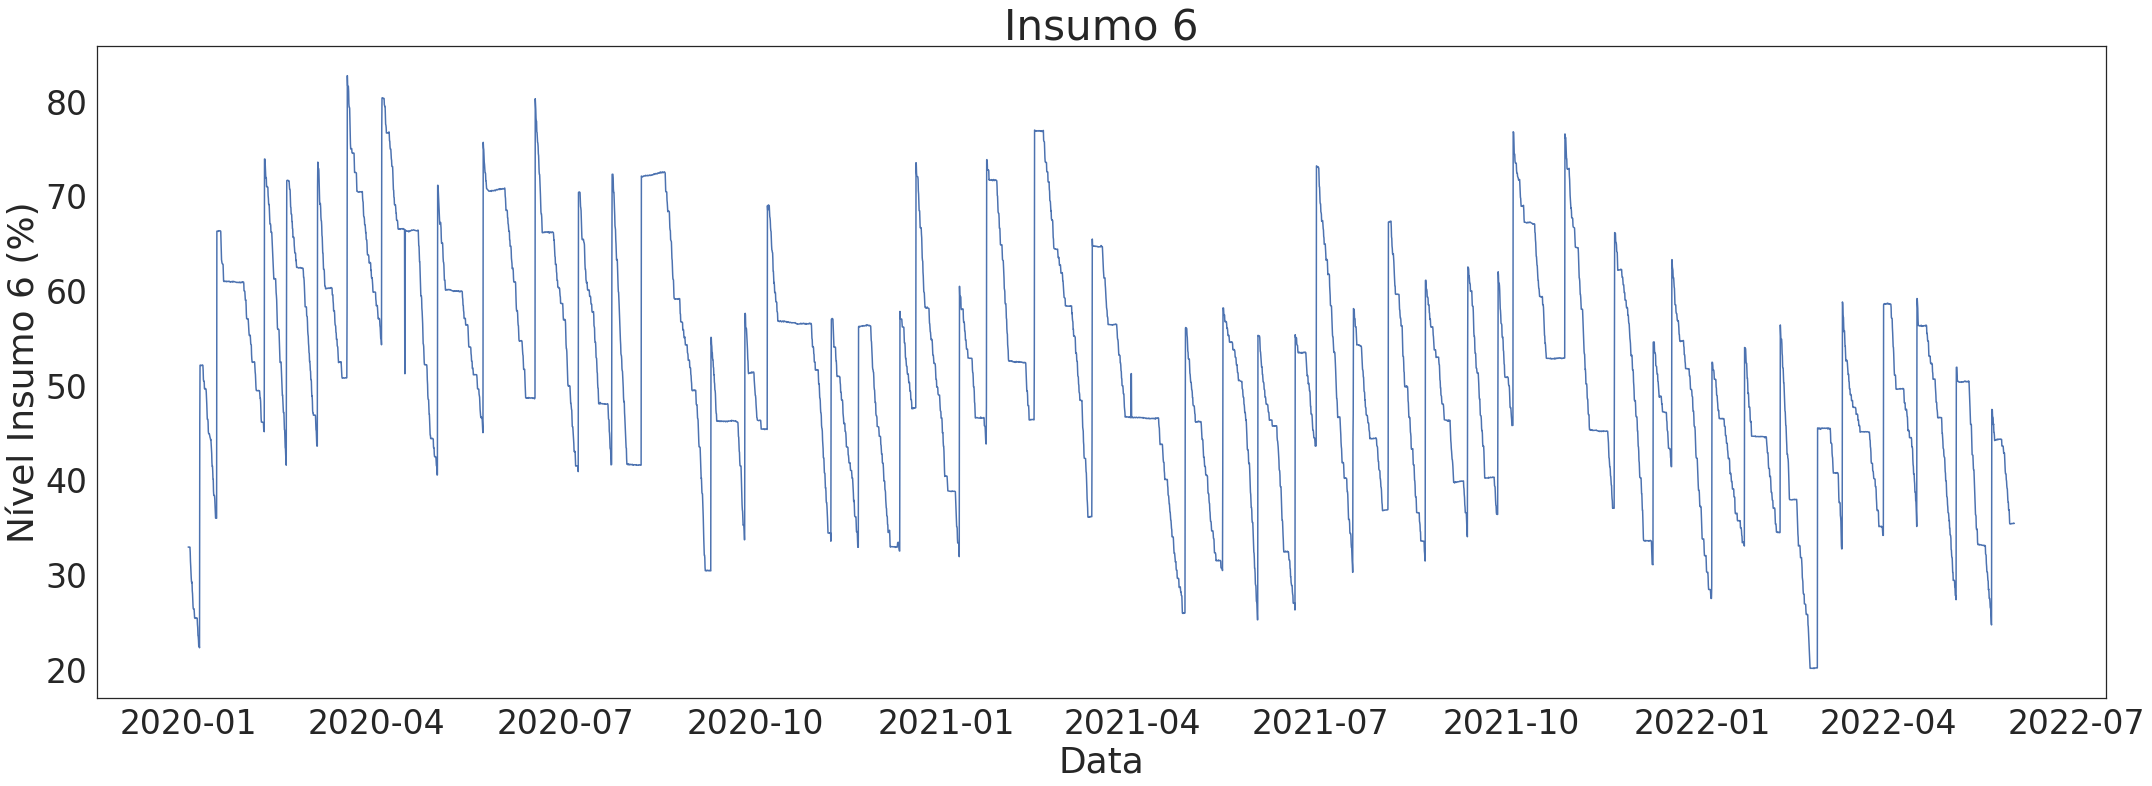

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=3)
sns.set_style("white")
sns.lineplot(x='Data', 
                y='Nível Insumo 6 (%)', 
                data=df)
plt.title("Insumo 6", fontsize=42)
plt.savefig("Time Series - Insumo 6.png", dpi=300)

In [ ]:
df_zoom = df.loc[(df.index >= "2022-01-01 00:00") & (df.index <= "2022-05-31 21:00")]

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=3)
sns.set_style("white")
sns.lineplot(x='Data', 
                y='Nível Insumo 6 (%)', 
                data=df_zoom)
plt.title("Insumo 6", fontsize=42)
plt.savefig("Zoomed Time Series - Insumo 6.png", dpi=300)

In [ ]:
fig, axis = plt.subplots(figsize =(10, 5))
sns.set(font_scale=1)
sns.set_style("white")
sns.distplot( a=df["Nível Insumo 6 (%)"], hist=True)
plt.title("Histograma", fontsize=24)
plt.savefig("Histograma - Insumo 6.png", dpi=300)

SEASONAL DECOMPOSITION

In [ ]:
#First we need to ensure DF frequency is D
df = df.resample('3H').mean()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_zoom, model='ad')

In [ ]:
#Plotting decomposition
from pylab import rcParams
rcParams['figure.figsize'] = 44,24
sns.set(font_scale=2.5)
sns.set_style("white")
result.plot()
plt.savefig("Decomposição_Sazonal_Insumo_6_Zoom.png", dpi=300)
plt.show()

CHECKING DATA STATIONARITY

In [ ]:
from typing_extensions import Literal

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = df.iloc[:,0].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
sm.tsa.stattools.kpss(df, regression='ct')

ACF AND PACF PLOTS

In [ ]:
sm.tsa.acf(df)

In [ ]:
rcParams['figure.figsize'] = 44,24
sns.set(font_scale=3)
sns.set_style("white")
fig = tsaplots.plot_acf(df, lags=40, zero=False)
plt.savefig("ACF_Teste_Insumo_6_40_lags.png", dpi=300)
plt.show()

In [ ]:
sm.tsa.pacf(df)

In [ ]:
fig = tsaplots.plot_pacf(df, lags=40, zero=False, method=('ols'))
plt.savefig("PACF_Teste_Insumo_6_40_lags.png", dpi=300)
plt.show()